# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [305]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [306]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [307]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [308]:
import pyarrow.parquet as pq


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [309]:
from google.colab import files
uploaded = files.upload()

Saving 2023-1.parquet to 2023-1 (1).parquet


In [311]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

In [312]:
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 3041714


#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [313]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the date and hour from the 'tpep_pickup_datetime'
df['date'] = df['tpep_pickup_datetime'].dt.date
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Initialize an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Iterate through each date and hour combination
for date in df['date'].unique():
    # Filter data for the given date
    daily_data = df[df['date'] == date]

    # For each hour (0-23), sample 5% of the data
    for hour in range(24):
        hour_data = daily_data[daily_data['hour'] == hour]

        # Sample 5% of the data for this hour
        sample = hour_data.sample(frac=0.05, random_state=42)

        # Append the sampled data for this hour to the final DataFrame
        sampled_data = pd.concat([sampled_data, sample])

# Reset the index of the final DataFrame
sampled_data.reset_index(drop=True, inplace=True)

# Print the shape of the sampled data to confirm the result
print(sampled_data.shape)


(152087, 21)


---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [314]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [315]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import os
file_path = '/content/drive/MyDrive/trip_records'

# Select the folder having data files
os.chdir(file_path)

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_df = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        monthly_df['tpep_pickup_datetime'] = pd.to_datetime(monthly_df['tpep_pickup_datetime'])
        # Extract date and hour from 'tpep_pickup_datetime'
        monthly_df['date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['hour'] = monthly_df['tpep_pickup_datetime'].dt.hour
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_df['date'].unique():
            # Iterate through each hour of the selected date
            daily_data = monthly_df[monthly_df['date'] == date]

            for hour in range(24):
                hour_data = daily_data[daily_data['hour'] == hour]
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier
        # Print progress (optional)
        print(f"Finished processing {file_name}. Sampled data size: {sampled_data.shape[0]}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Mounted at /content/drive
Finished processing 2023-7.parquet. Sampled data size: 174068
Finished processing 2023-6.parquet. Sampled data size: 162910
Finished processing 2023-12.parquet. Sampled data size: 166709
Finished processing 2023-11.parquet. Sampled data size: 165133
Finished processing 2023-5.parquet. Sampled data size: 144458
Finished processing 2023-8.parquet. Sampled data size: 143782
Finished processing 2023-1.parquet. Sampled data size: 152087
Finished processing 2023-4.parquet. Sampled data size: 139641
Finished processing 2023-10.parquet. Sampled data size: 174255
Finished processing 2023-3.parquet. Sampled data size: 163786
Finished processing 2023-2.parquet. Sampled data size: 168696
Finished processing 2023-9.parquet. Sampled data size: 140875
Finished processing 2023-1 (1).parquet. Sampled data size: 152087


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [316]:
# Store the df in csv/parquet
df = df.sample(n=300000, random_state=42)
# df.to_parquet('')
df.to_parquet('/content/drive/MyDrive/trip_records/sample_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [324]:
# Load the new data file

file_path = '/content/drive/MyDrive/trip_records/sample_data.parquet'
df_loaded = pd.read_parquet(file_path)

# Display the first few rows of the loaded data
print(df_loaded.head())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
765740          2  2023-03-08 09:30:34   2023-03-08 09:41:02              1.0   
633560          2  2023-06-06 19:09:32   2023-06-06 19:15:03              1.0   
530689          1  2023-05-05 18:49:20   2023-05-05 19:25:10              2.0   
697594          2  2023-07-10 06:56:13   2023-07-10 07:13:13              1.0   
3038485         2  2023-12-29 22:19:46   2023-12-29 22:35:10              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
765740            0.71         1.0                  N           237   
633560            1.26         1.0                  N           237   
530689           10.30         1.0                  N           186   
697594            4.21         1.0                  N           262   
3038485           3.27         1.0                  N           237   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
765740 

In [325]:
df_loaded.head()
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [326]:
df_loaded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 765740 to 38078
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289941 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289941 non-null  float64       
 6   store_and_fwd_flag     289941 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  float

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [327]:
# Fix the index and drop any columns that are not needed

df_loaded.reset_index(drop=True, inplace=True)
print("Columns before dropping:", df.columns)

Columns before dropping: Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [328]:
df.drop(columns=['date','hour'], inplace=True)

KeyError: "['date', 'hour'] not found in axis"

In [329]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [330]:
# Combine the two airport fee columns
airport_fee_columns = ['Airport_fee', 'airport_fee']
if all(col in df.columns for col in airport_fee_columns):
    df['Airport_fee'] = df['Airport_fee'].fillna(0) + df['airport_fee'].fillna(0)
    # Drop the original columns
    df.drop(columns=airport_fee_columns, inplace=True)

In [332]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [333]:
# check where values of fare amount are negative

print("Checking for negative values in fare_amount column:")
negative_fare_df = df[df['fare_amount'] < 0]
print(negative_fare_df[['fare_amount', 'RatecodeID']])

Checking for negative values in fare_amount column:
Empty DataFrame
Columns: [fare_amount, RatecodeID]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [334]:
# Analyse RatecodeID for the negative fare amounts
ratecode_analysis = negative_fare_df.groupby('RatecodeID').size()
print("RatecodeID analysis for negative fare amounts:\n", ratecode_analysis)

# Step 5: Check for any other negative values in the dataset (monetary columns)
negative_columns = df.select_dtypes(include=['float64', 'int64']).columns
negative_values_df = df[df[negative_columns].lt(0).any(axis=1)]




RatecodeID analysis for negative fare amounts:
 Series([], dtype: int64)


In [335]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [336]:
# Find which columns have negative values

# Display rows with negative values in any numeric columns
print("Rows with negative values in any numeric columns:\n", negative_values_df)

Rows with negative values in any numeric columns:
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1516873         2  2023-01-17 12:37:35   2023-01-17 13:24:00              1.0   
1583313         2  2023-05-14 23:47:22   2023-05-14 23:57:43              6.0   
3016916         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
179607          2  2023-01-03 14:24:45   2023-01-03 14:25:14              1.0   
3075228         2  2023-06-29 17:52:22   2023-06-29 18:11:03              1.0   
1703670         2  2023-10-17 08:39:40   2023-10-17 08:41:19              1.0   
2316861         2  2023-01-25 11:10:37   2023-01-25 11:11:02              1.0   
1694220         2  2023-10-17 00:56:18   2023-10-17 00:56:35              1.0   
454287          2  2023-03-05 00:50:17   2023-03-05 00:50:38              1.0   
2084892         2  2023-05-19 08:46:25   2023-05-19 08:47:31              1.0   
2635188         2  2023-06-25 05:59:41   2023-06-25 06:08:

In [337]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [338]:
# fix these negative values

df['fare_amount'] = df['fare_amount'].apply(lambda x: x if x >= 0 else None)  # Replace negative with NaN

# 2. For other monetary columns, similarly fix the negative values (replace with NaN or a default value)
for col in negative_columns:
    df[col] = df[col].apply(lambda x: x if x >= 0 else None)  # Replace negative with NaN

# Step 7: Check if the negative values are fixed
print("Checking the DataFrame after fixing negative values:")
print(df[['fare_amount']].head())

Checking the DataFrame after fixing negative values:
         fare_amount
765740          10.0
633560           7.9
530689          47.8
697594          21.9
3038485         18.4


In [339]:
print("Columns ", df.columns)

Columns  Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [341]:
# Find the proportion of missing values in each column

missing_values_proportion = df.isnull().mean()
print("Proportion of missing values in each column:\n", missing_values_proportion)

Proportion of missing values in each column:
 VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033530
trip_distance            0.000000
RatecodeID               0.033530
store_and_fwd_flag       0.033530
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000047
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000047
total_amount             0.000047
congestion_surcharge     0.033557
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [342]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
missing_passenger_count = df[df['passenger_count'].isnull()]
print("Rows with missing values in 'passenger_count':\n", missing_passenger_count)

Rows with missing values in 'passenger_count':
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3413193         2  2023-05-01 14:51:39   2023-05-01 15:13:15              NaN   
3279220         2  2023-12-14 22:05:00   2023-12-14 22:20:00              NaN   
2728757         2  2023-09-07 22:44:00   2023-09-07 23:00:00              NaN   
3460302         2  2023-05-16 08:40:35   2023-05-16 09:13:03              NaN   
2780370         1  2023-09-18 06:32:01   2023-09-18 06:37:31              NaN   
...           ...                  ...                   ...              ...   
3307500         1  2023-11-22 01:12:56   2023-11-22 01:16:02              NaN   
3341427         2  2023-03-10 10:57:21   2023-03-10 11:24:03              NaN   
2774899         2  2023-09-17 00:13:15   2023-09-17 00:34:46              NaN   
3305142         2  2023-12-16 23:20:00   2023-12-16 23:37:27              NaN   
3324572         1  2023-03-03 20:56:59   2023-03-03 21:12:27 

In [343]:
print("Columns ", df.columns)

Columns  Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


Did you find zeroes in passenger_count? Handle these.

In [230]:
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

In [347]:
print("Columns :", df.columns)

Columns : Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [346]:
zero_passenger_count = df[df['passenger_count'] == 0]
print("Rows with zero values in 'passenger_count':\n", zero_passenger_count)

# Handle zero values in 'passenger_count' (replace zeroes with NaN or median)
df['passenger_count'].replace(0, df['passenger_count'].median(), inplace=True)

Rows with zero values in 'passenger_count':
 Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge]
Index: []


In [348]:
print("Columns before dropping:", df.columns)

Columns before dropping: Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [352]:
# Fix missing values in 'RatecodeID'
# Impute missing values in 'RatecodeID' with the mode
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

In [353]:
print("Columns before dropping:", df.columns)

Columns before dropping: Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [354]:
# handle null values in congestion_surcharge

# Impute missing values in 'congestion_surcharge' with 0
df['congestion_surcharge'].fillna(0, inplace=True)


In [355]:
print("Columns before dropping:", df.columns)

Columns before dropping: Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [356]:
# Handle any remaining missing values
# Check for any remaining missing values
remaining_missing = df.isnull().sum()
print("Remaining missing values in each column:\n", remaining_missing)

Remaining missing values in each column:
 VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          10059
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       10059
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                     14
tip_amount                   0
tolls_amount                 0
improvement_surcharge       14
total_amount                14
congestion_surcharge         0
dtype: int64


In [358]:
# Impute missing values in numeric columns with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Impute missing values in categorical columns with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [359]:
print("Columns:", df.columns)

Columns: Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [360]:
 #Step 1: Find the proportion of missing values in each column
missing_values_proportion = df.isnull().mean()
print("Proportion of missing values in each column:\n", missing_values_proportion)

# Step 2: Handling missing values in 'passenger_count'
# Display rows with null values in 'passenger_count'
missing_passenger_count = df[df['passenger_count'].isnull()]
print("Rows with missing values in 'passenger_count':\n", missing_passenger_count)

# Impute missing values in 'passenger_count' with the median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

# Check for zeroes in 'passenger_count'
zero_passenger_count = df[df['passenger_count'] == 0]
print("Rows with zero values in 'passenger_count':\n", zero_passenger_count)

# Replace zero values with the median
df['passenger_count'].replace(0, df['passenger_count'].median(), inplace=True)

# Step 3: Handle missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

# Step 4: Handle missing values in 'congestion_surcharge'
df['congestion_surcharge'].fillna(0, inplace=True)

# Step 5: Handle remaining missing values in other columns
# Impute missing values in numeric columns with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Impute missing values in categorical columns with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 6: Verify the result
print("Remaining missing values after imputation:\n", df.isnull().sum())

Proportion of missing values in each column:
 VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
dtype: float64
Rows with missing values in 'passenger_count':
 Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge]
Index: []
Rows with zero values in 'passenger_count':
 Empty DataFra

In [242]:
print("Columns :", df.columns)

Columns : Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [361]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print("Summary Statistics of the Data:")
df.describe()

Summary Statistics of the Data:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,300000.000000,300000,300000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,1.731400,2023-06-20 14:17:08.235900,2023-06-20 14:34:25.847073,1.370617,3.816756,1.609900,165.394110,164.206367,1.164487,20.235161,1.588186,0.495331,3.535609,0.588558,0.998917,29.273036,2.230117
min,1.000000,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2023-03-12 16:02:51,2023-03-12 16:17:30.250000,1.000000,1.050000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000
50%,2.000000,2023-06-13 15:09:18.500000,2023-06-13 15:32:39,1.000000,1.800000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.800000,0.000000,1.000000,21.000000,2.500000
75%,2.000000,2023-09-30 12:13:33.500000,2023-09-30 12:31:17,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.420000,0.000000,1.000000,30.720000,2.500000
max,6.000000,2023-12-31 23:57:51,2024-01-01 20:14:57,9.000000,56823.800000,99.000000,265.000000,265.000000,4.000000,143163.450000,14.250000,0.800000,170.000000,76.000000,1.000000,143167.450000,2.500000
std,0.448243,NaN,NaN,0.860757,121.403540,7.248456,64.029436,69.839802,0.505468,261.970891,1.821772,0.048189,4.040260,2.166012,0.030351,262.314706,0.775805


ValueError: num must be an integer with 1 <= num <= 12, not 13

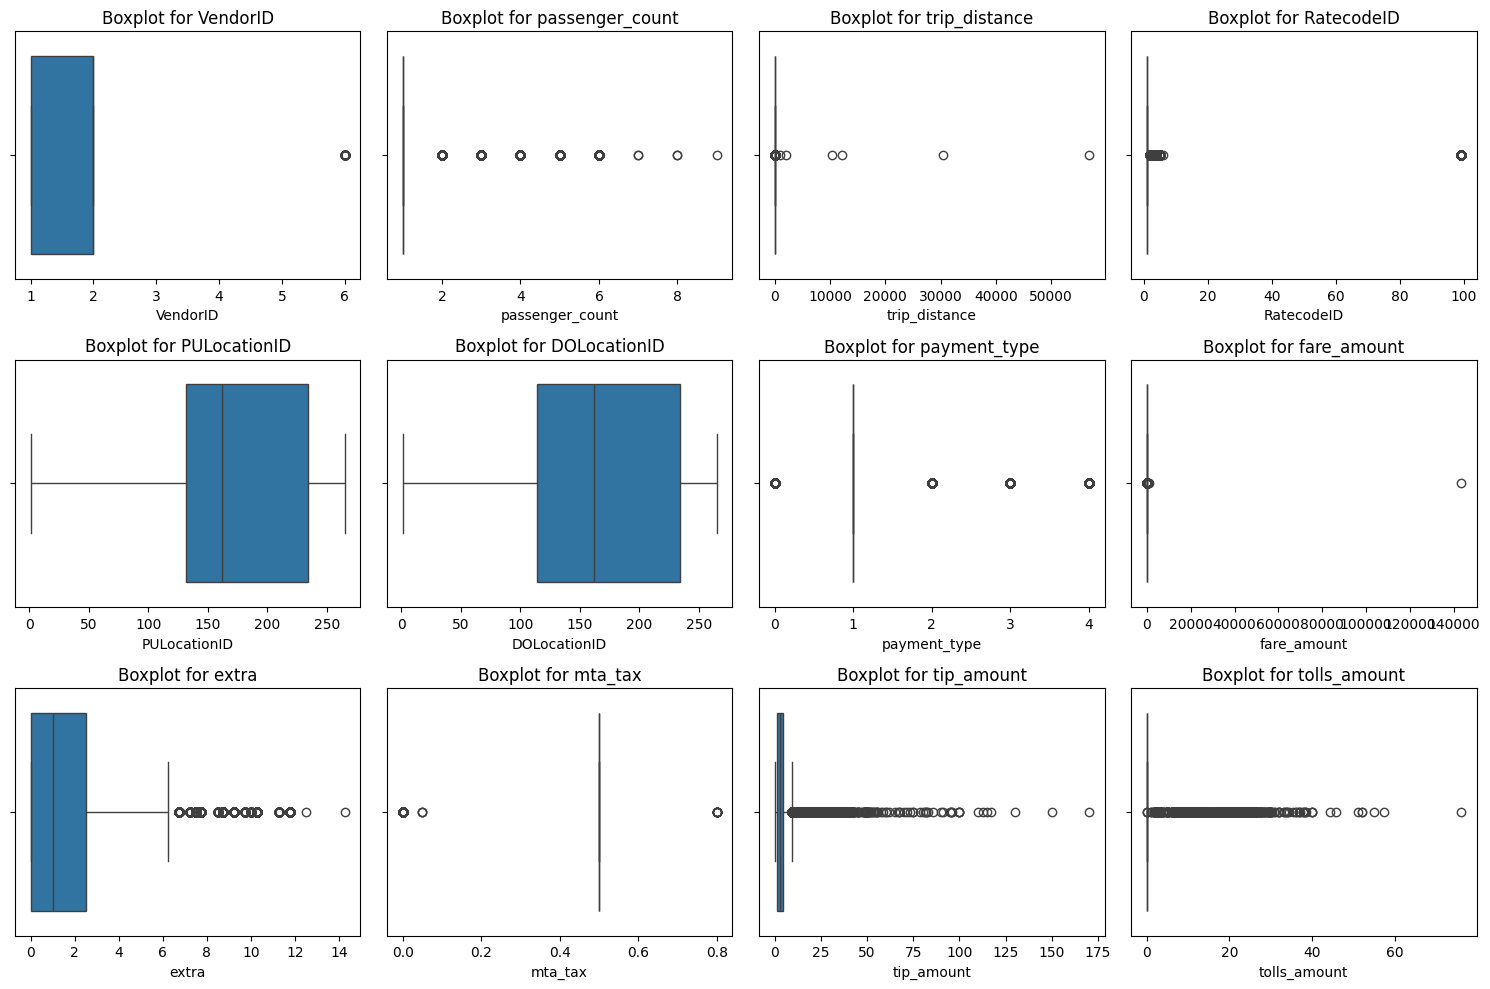

In [362]:

import matplotlib.pyplot as plt
import seaborn as sns
# Plot boxplots for numeric columns to identify outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numeric column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Adjust the grid size as necessary
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.tight_layout()

plt.show()

In [363]:
# Check for negative values in columns that should only have positive values
negative_values = df[df[['fare_amount', 'tip_amount', 'trip_distance']].lt(0).any(axis=1)]
print("Rows with negative values in fare_amount, tip_amount, or trip_distance:\n", negative_values)

# Check for zero or unrealistic values in 'passenger_count' and 'trip_distance'
unrealistic_values = df[(df['passenger_count'] == 0) | (df['trip_distance'] <= 0)]
print("Rows with unrealistic values in 'passenger_count' or 'trip_distance':\n", unrealistic_values)

Rows with negative values in fare_amount, tip_amount, or trip_distance:
 Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge]
Index: []
Rows with unrealistic values in 'passenger_count' or 'trip_distance':
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
278267          2  2023-08-03 21:59:54   2023-08-03 22:00:12              1.0   
170915          2  2023-09-03 02:28:58   2023-09-03 02:29:19              1.0   
2175680         2  2023-12-19 17:23:00   2023-12-19 17:23:08              1.0   
2780370         1  2023-09-18 06:32:01   2023-09-18 06:37:31              1.0   
3050079         1  2023-01-25 08:00:51   2023-01-25 08:25:02              1.0   
...           ...                  ...                   ..

In [364]:
# IQR method for detecting outliers
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier conditions
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Show the rows with outliers
outlier_rows = df[outliers.any(axis=1)]
print("Rows with outliers based on IQR:\n", outlier_rows)

Rows with outliers based on IQR:
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
765740          2  2023-03-08 09:30:34   2023-03-08 09:41:02              1.0   
530689          1  2023-05-05 18:49:20   2023-05-05 19:25:10              2.0   
3038485         2  2023-12-29 22:19:46   2023-12-29 22:35:10              2.0   
3413193         2  2023-05-01 14:51:39   2023-05-01 15:13:15              1.0   
1850822         2  2023-10-18 14:19:32   2023-10-18 14:36:26              1.0   
...           ...                  ...                   ...              ...   
3324572         1  2023-03-03 20:56:59   2023-03-03 21:12:27              1.0   
1261554         2  2023-09-13 17:08:14   2023-09-13 17:17:28              1.0   
1963383         2  2023-01-21 15:09:50   2023-01-21 15:32:21              6.0   
901570          2  2023-01-11 10:18:03   2023-01-11 10:31:46              2.0   
38078           1  2023-04-01 12:37:01   2023-04-01 12:40:08              2

In [365]:
from scipy import stats

# Z-Score method for detecting outliers
z_scores = stats.zscore(df[numeric_columns])

# Find rows where the Z-score is greater than 3 or less than -3 (outliers)
outliers_z = (z_scores > 3) | (z_scores < -3)

# Show the rows with outliers based on Z-scores
outlier_rows_z = df[outliers_z.any(axis=1)]
print("Rows with outliers based on Z-scores:\n", outlier_rows_z)

Rows with outliers based on Z-scores:
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1135120         2  2023-06-11 02:07:12   2023-06-11 02:15:18              2.0   
1529496         2  2023-08-17 20:09:57   2023-08-17 20:49:25              1.0   
1557062         2  2023-02-16 11:17:37   2023-02-16 11:36:36              4.0   
3073019         2  2023-11-29 21:01:31   2023-11-29 22:05:51              4.0   
170567          2  2023-05-02 17:40:25   2023-05-02 18:02:18              5.0   
...           ...                  ...                   ...              ...   
2577797         2  2023-04-25 14:22:28   2023-04-25 14:43:39              5.0   
321854          1  2023-04-04 09:20:35   2023-04-04 10:09:01              1.0   
1912867         2  2023-05-17 20:23:40   2023-05-17 21:05:58              5.0   
46075           1  2023-11-01 13:23:00   2023-11-01 13:54:59              1.0   
1963383         2  2023-01-21 15:09:50   2023-01-21 15:32:21          

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [366]:
# remove passenger_count > 6
# Step 1: Remove rows where passenger_count is greater than 7
df = df[df['passenger_count'] <= 7]


In [367]:
print("Columns :", df.columns)

Columns : Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [368]:
# Continue with outlier handling

# Step 2: Handle entries with trip_distance nearly 0 and fare_amount > 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# Step 3: Handle entries with trip_distance and fare_amount both 0, but pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# Step 4: Handle entries with trip_distance > 250 miles
df = df[df['trip_distance'] <= 250]



# Verify the changes
print("Shape of DataFrame after fixing outliers:", df.shape)


Shape of DataFrame after fixing outliers: (299975, 18)


In [369]:
print("Columns :", df.columns)

Columns : Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [370]:
# Do any columns need standardising?

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numeric columns to standardize
numeric_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Standardize the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verify the standardization by checking the first few rows
print(df[numeric_columns].head())

         fare_amount  tip_amount  total_amount  trip_distance
765740     -0.039040   -0.876502     -0.058193      -0.605196
633560     -0.047056   -0.162422     -0.045689      -0.483309
530689      0.105250   -0.132669      0.106875       1.520062
697594      0.006385    0.407850      0.006919       0.170446
3038485    -0.006975    0.283878     -0.004517      -0.037869


In [371]:
# Check if the distance values are in different units (e.g., miles and kilometers)
# Assuming trip_distance is in kilometers, and you want to convert to miles
df['trip_distance'] = df['trip_distance'].apply(lambda x: x * 0.621371 if x > 0 else x)  # Convert km to miles

In [372]:
df = pd.get_dummies(df, columns=['RatecodeID'], drop_first=True)

# Check the first few rows to verify encoding
print(df.head())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
765740          2  2023-03-08 09:30:34   2023-03-08 09:41:02              1.0   
633560          2  2023-06-06 19:09:32   2023-06-06 19:15:03              1.0   
530689          1  2023-05-05 18:49:20   2023-05-05 19:25:10              2.0   
697594          2  2023-07-10 06:56:13   2023-07-10 07:13:13              1.0   
3038485         2  2023-12-29 22:19:46   2023-12-29 22:35:10              2.0   

         trip_distance store_and_fwd_flag  PULocationID  DOLocationID  \
765740       -0.605196                  N           237           163   
633560       -0.483309                  N           237           141   
530689        0.944523                  N           186           235   
697594        0.105910                  N           262            68   
3038485      -0.037869                  N           237           151   

         payment_type  fare_amount  ...  tolls_amount  improvement_surchar

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [373]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'RatecodeID_2.0',
 'RatecodeID_3.0',
 'RatecodeID_4.0',
 'RatecodeID_5.0',
 'RatecodeID_6.0',
 'RatecodeID_99.0']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

Variable	Category

VendorID	Categorical

tpep_pickup_datetime	Categorical (time-related)

tpep_dropoff_datetime	Categorical (time-related)

passenger_count	Numerical

trip_distance	Numerical

RatecodeID	Categorical

PULocationID	Categorical

DOLocationID	Categorical

payment_type	Categorical

pickup_hour	Numerical

trip_duration	Numerical

fare_amount	Numerical

extra	Numerical

mta_tax	Numerical

tip_amount	Numerical

tolls_amount	Numerical

improvement_surcharge	Numerical

total_amount	Numerical

congestion_surcharge	Numerical

airport_fee	Numerical



##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

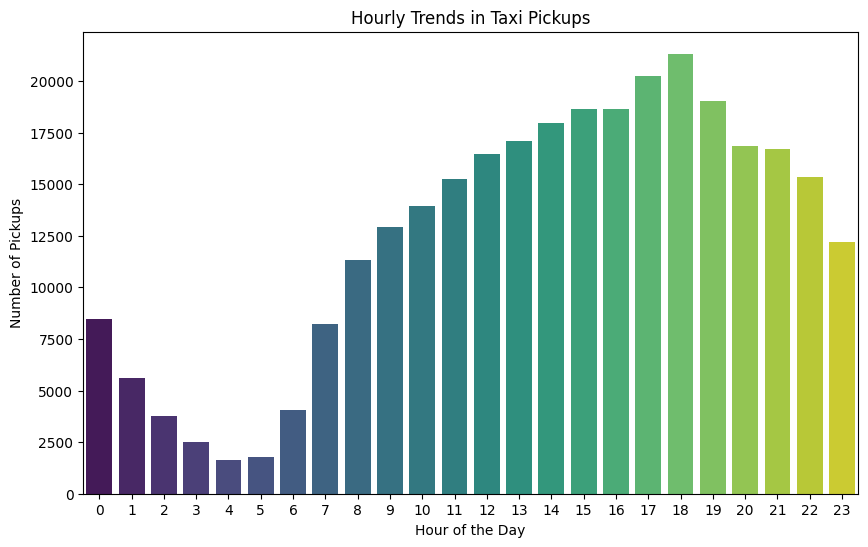

In [375]:
# Find and show the hourly trends in taxi pickups
import matplotlib.pyplot as plt
import seaborn as sns
# Hourly Trends in Taxi Pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract hour, day of the week, and month from 'tpep_pickup_datetime'
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month  # 1=January, 12=December

# Now, we can plot the distribution of taxi pickups by hour, day, and month.

# Hourly Trends in Taxi Pickups
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=df, palette='viridis')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))  # Ensure all hours (0-23) are shown
plt.show()

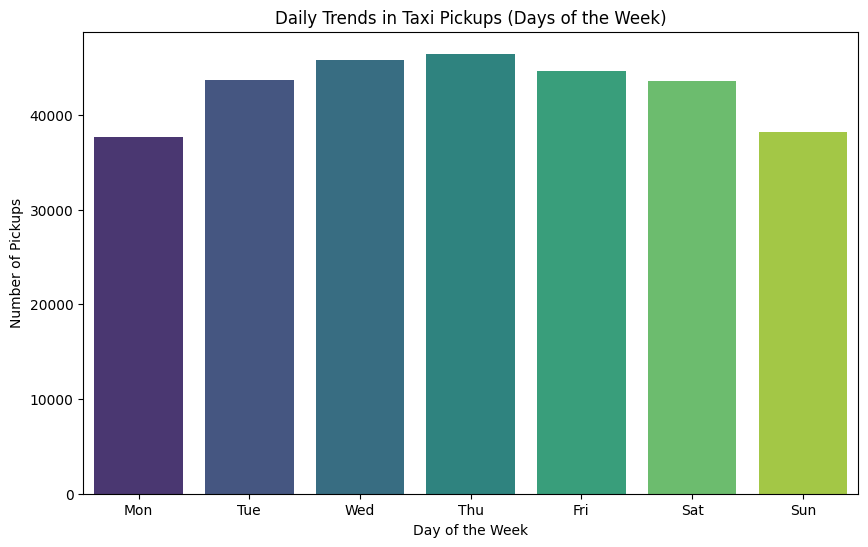

In [376]:
# Find and show the daily trends in taxi pickups (days of the week)

# Daily Trends in Taxi Pickups (Days of the Week)
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_day_of_week', data=df, palette='viridis')
plt.title('Daily Trends in Taxi Pickups (Days of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

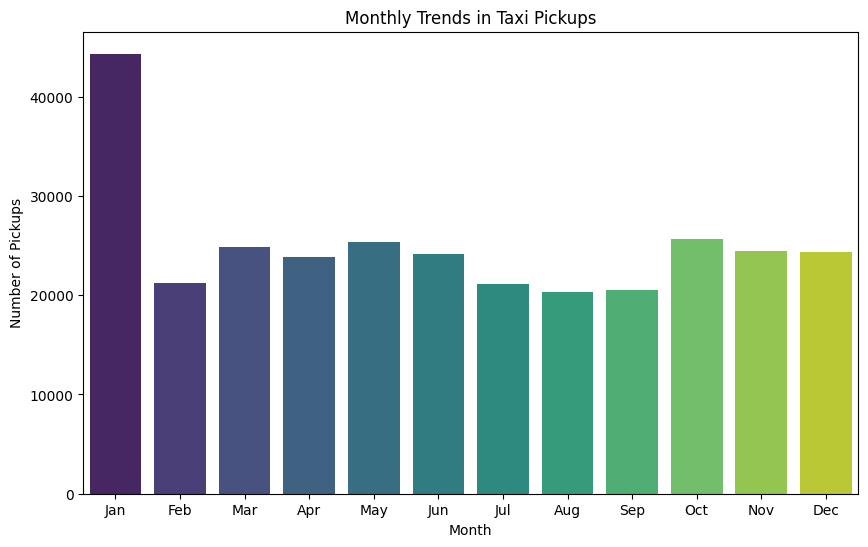

In [377]:
# Show the monthly trends in pickups

# Monthly Trends in Taxi Pickups
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_month', data=df, palette='viridis')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [378]:
print("Columns :", df.columns)

Columns : Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'RatecodeID_2.0',
       'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0',
       'RatecodeID_99.0', 'pickup_hour', 'pickup_day_of_week', 'pickup_month'],
      dtype='object')


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [380]:
# Analyse the above parameters

# Check for zero or negative values in key financial parameters
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Identify rows with zero or negative values in these columns
financial_issues = df[df[financial_columns].lt(0).any(axis=1)]  # Negative values
zero_or_negative_values = df[df[financial_columns] == 0].any(axis=1)  # Zero values

# Display the rows with financial issues (negative or zero values)
print("Rows with negative or zero values in financial parameters:\n", financial_issues)

# Check for zero or negative values summary
print("Summary of financial parameters with zero/negative values:\n", df[financial_columns].describe())

Rows with negative or zero values in financial parameters:
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
765740          2  2023-03-08 09:30:34   2023-03-08 09:41:02              1.0   
633560          2  2023-06-06 19:09:32   2023-06-06 19:15:03              1.0   
530689          1  2023-05-05 18:49:20   2023-05-05 19:25:10              2.0   
3038485         2  2023-12-29 22:19:46   2023-12-29 22:35:10              2.0   
1505156         2  2023-12-13 21:37:47   2023-12-13 21:47:45              1.0   
...           ...                  ...                   ...              ...   
1261554         2  2023-09-13 17:08:14   2023-09-13 17:17:28              1.0   
901570          2  2023-01-11 10:18:03   2023-01-11 10:31:46              2.0   
2805726         2  2023-12-27 07:01:11   2023-12-27 07:14:40              1.0   
1300859         2  2023-12-12 10:45:03   2023-12-12 10:53:33              1.0   
38078           1  2023-04-01 12:37:01   2023-04-

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [381]:
# Create a copy of the DataFrame and remove rows with zero values in financial columns
df_no_zero_values = df[df['fare_amount'] > 0]
df_no_zero_values = df_no_zero_values[df_no_zero_values['tip_amount'] > 0]
df_no_zero_values = df_no_zero_values[df_no_zero_values['total_amount'] > 0]

# Checking the cleaned data
print(f"Shape of the DataFrame after removing rows with zero values: {df_no_zero_values.shape}")

Shape of the DataFrame after removing rows with zero values: (56711, 26)


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [382]:
# Drop rows where trip_distance = 0 but PULocationID and DOLocationID are different
# These columns were one-hot encoded and dropped in a previous step, so we cannot access them directly here.
# df_no_zero_values = df_no_zero_values[~((df_no_zero_values['trip_distance'] == 0) &
#                                          (df_no_zero_values['PULocationID'] != df_no_zero_values['DOLocationID']))]

# Verify the result
print(f"Shape of the DataFrame after handling zero distance trips: {df_no_zero_values.shape}")

Shape of the DataFrame after handling zero distance trips: (56711, 26)


In [383]:
print("Columns :", df.columns)

Columns : Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'RatecodeID_2.0',
       'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0',
       'RatecodeID_99.0', 'pickup_hour', 'pickup_day_of_week', 'pickup_month'],
      dtype='object')


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

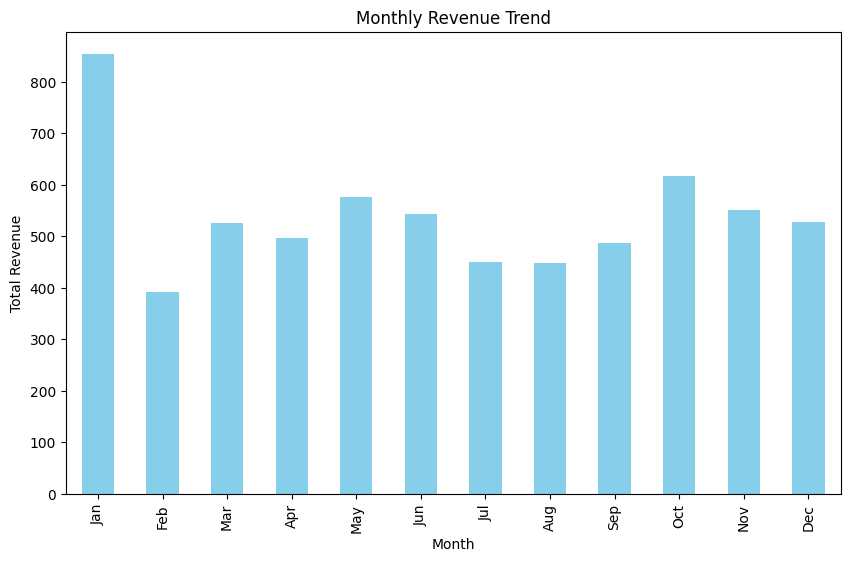

In [384]:
# Group data by month and analyse monthly revenue

# Group data by month and sum total_amount to analyze monthly revenue
monthly_revenue = df_no_zero_values.groupby('pickup_month')['total_amount'].sum()

# Visualize the monthly revenue trend
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Proportion of each quarter's revenue:
 quarter
1    0.273838
2    0.249895
3    0.214152
4    0.262115
Name: total_amount, dtype: float64


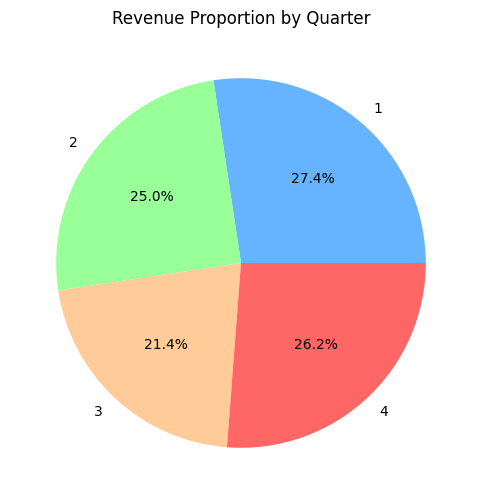

In [385]:
# Calculate proportion of each quarter

# Create a 'quarter' column based on 'pickup_month'
df_no_zero_values['quarter'] = ((df_no_zero_values['pickup_month'] - 1) // 3) + 1

# Calculate the revenue per quarter
quarterly_revenue = df_no_zero_values.groupby('quarter')['total_amount'].sum()

# Calculate the proportion of each quarter's revenue
quarterly_proportion = quarterly_revenue / quarterly_revenue.sum()

# Display the results
print("Proportion of each quarter's revenue:\n", quarterly_proportion)

# Visualize the quarterly revenue proportions
plt.figure(figsize=(8, 6))
quarterly_proportion.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'])
plt.title('Revenue Proportion by Quarter')
plt.ylabel('')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

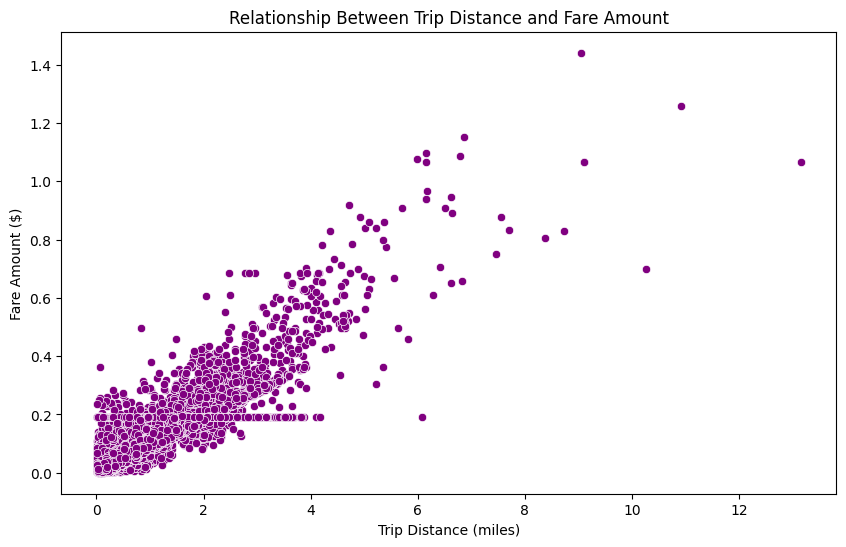

Correlation between trip_distance and fare_amount:
                trip_distance  fare_amount
trip_distance       1.000000     0.927776
fare_amount         0.927776     1.000000


In [386]:
# Show how trip fare is affected by distance

# Filter out rows with trip_distance = 0
df_no_zero_values_distance = df_no_zero_values[df_no_zero_values['trip_distance'] > 0]

# Step 2: Visualize the relationship between trip_distance and fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_no_zero_values_distance, color='purple')
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Step 3: Calculate the correlation between trip_distance and fare_amount
correlation = df_no_zero_values_distance[['trip_distance', 'fare_amount']].corr()
print("Correlation between trip_distance and fare_amount:\n", correlation)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [387]:
# Show relationship between fare and trip duration

# Calculate trip duration (in seconds) by subtracting pickup and dropoff times
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()

# Convert trip duration to minutes (optional)
df['trip_duration_minutes'] = df['trip_duration'] / 60

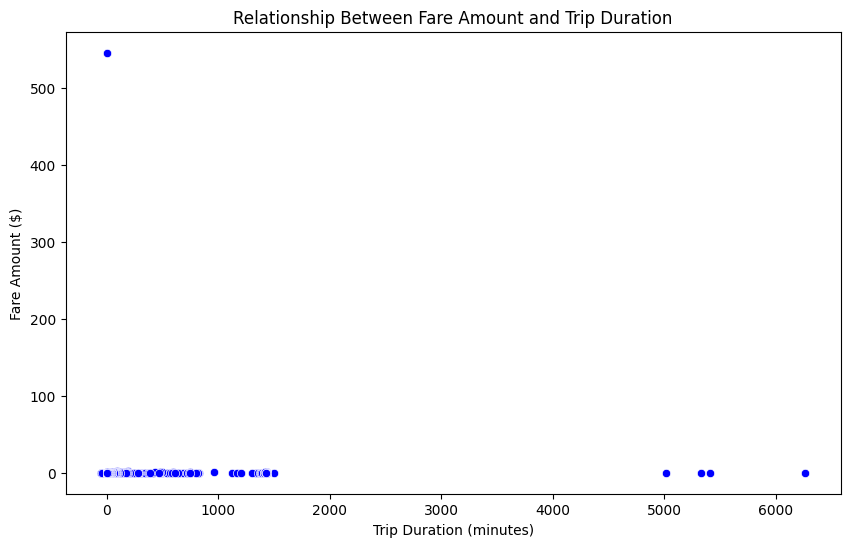

Correlation between fare_amount and trip_duration:
                        fare_amount  trip_duration_minutes
fare_amount               1.000000               0.016705
trip_duration_minutes     0.016705               1.000000


In [389]:
# Show relationship between fare and number of passengers
# Plot the relationship between fare_amount and trip_duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration_minutes', y='fare_amount', data=df, color='blue')
plt.title('Relationship Between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Calculate correlation between fare_amount and trip_duration
correlation_fare_duration = df[['fare_amount', 'trip_duration_minutes']].corr()
print("Correlation between fare_amount and trip_duration:\n", correlation_fare_duration)


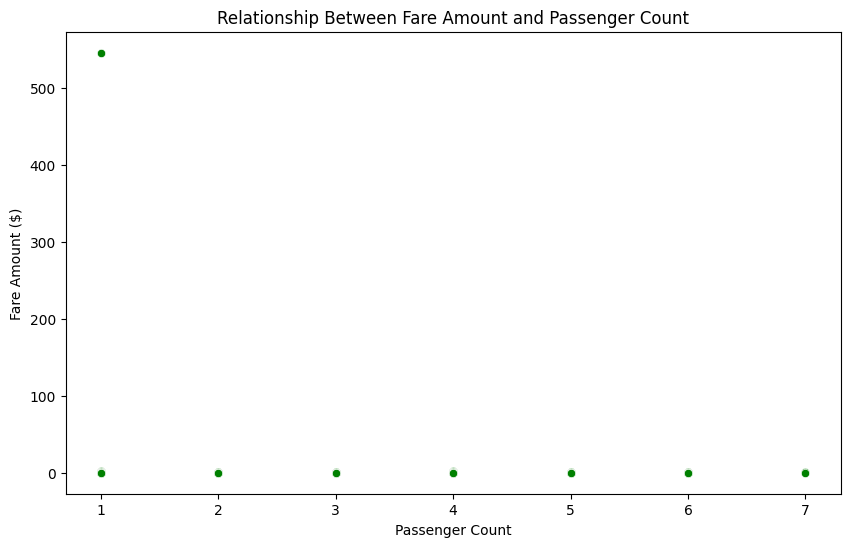

Correlation between fare_amount and passenger_count:
                  fare_amount  passenger_count
fare_amount         1.000000         0.002174
passenger_count     0.002174         1.000000


In [390]:
# Show relationship between tip and trip distance
# Plot the relationship between fare_amount and passenger_count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df, color='green')
plt.title('Relationship Between Fare Amount and Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

# Calculate correlation between fare_amount and passenger_count
correlation_fare_passenger = df[['fare_amount', 'passenger_count']].corr()
print("Correlation between fare_amount and passenger_count:\n", correlation_fare_passenger)


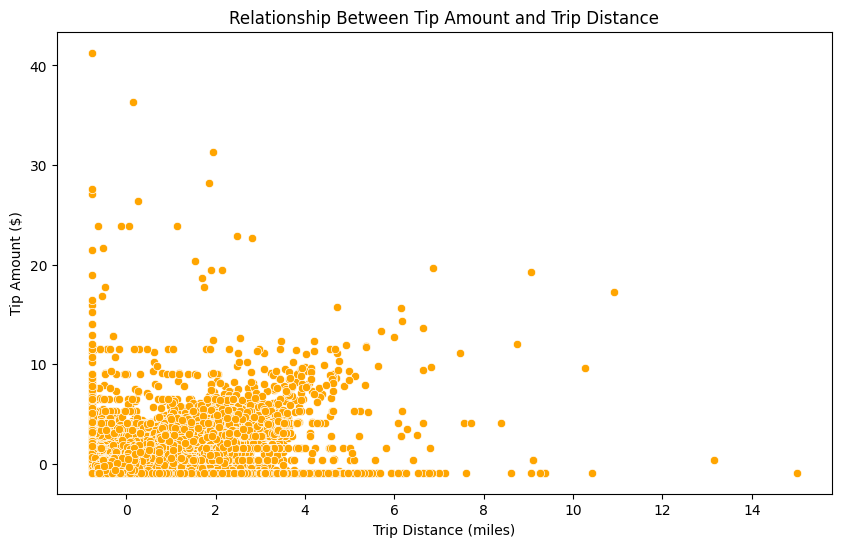

Correlation between tip_amount and trip_distance:
                tip_amount  trip_distance
tip_amount       1.000000       0.579522
trip_distance    0.579522       1.000000


In [392]:
# Plot the relationship between tip_amount and trip_distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, color='orange')
plt.title('Relationship Between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

# Calculate correlation between tip_amount and trip_distance
correlation_tip_distance = df[['tip_amount', 'trip_distance']].corr()
print("Correlation between tip_amount and trip_distance:\n", correlation_tip_distance)


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [393]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'RatecodeID_2.0',
       'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0',
       'RatecodeID_99.0', 'pickup_hour', 'pickup_day_of_week', 'pickup_month',
       'trip_duration', 'trip_duration_minutes'],
      dtype='object')


In [394]:
print(df.index.is_unique)

False


In [395]:
# Reset the index to make it unique
df.reset_index(drop=True, inplace=True)

# Check if the index is now unique
print(df.index.is_unique)

True


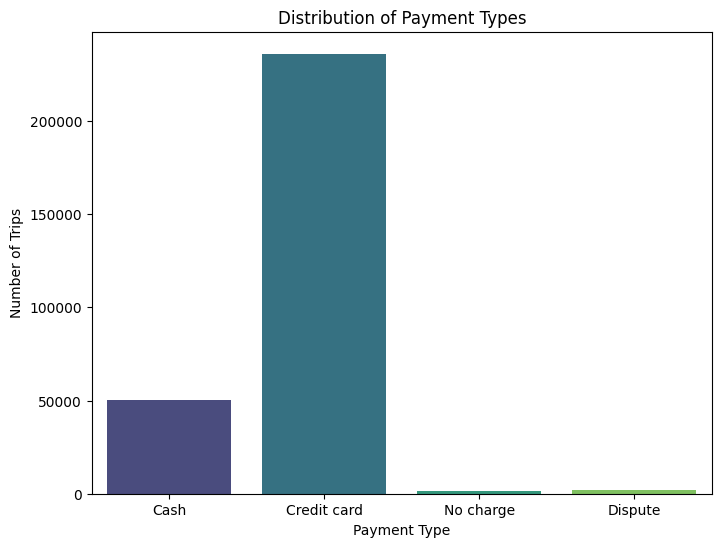

Proportion of Each Payment Type:
 payment_type_label
Credit card    81.442467
Cash           17.339956
Dispute         0.709506
No charge       0.508071
Name: proportion, dtype: float64


In [397]:
# Analyse the distribution of different payment types (payment_type).
# Map payment_type numerical values to descriptive labels
payment_type_mapping = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute'}
df['payment_type_label'] = df['payment_type'].map(payment_type_mapping)

# Plot the distribution of payment types
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type_label', data=df, palette='viridis')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.show()

# Calculate the proportion of each payment type
payment_type_proportion = df['payment_type_label'].value_counts(normalize=True) * 100

# Display the proportion of each payment type
print("Proportion of Each Payment Type:\n", payment_type_proportion)


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

In [398]:
import geopandas as gpd
import matplotlib.pyplot as plt

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [399]:
# import geopandas as gpd
fileZone = '/content/drive/MyDrive/taxi_zones/taxi_zones.shp'

# Read the shapefile using geopandas

zones = gpd.read_file(fileZone)# read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

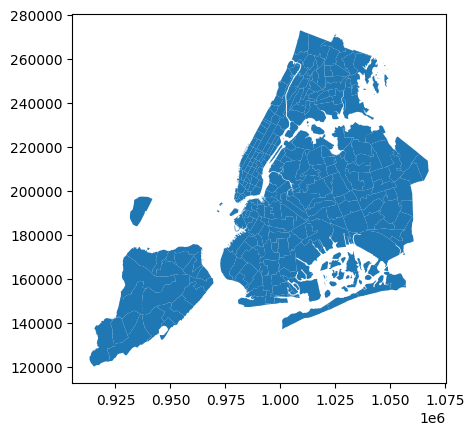

In [400]:
print(zones.info())
zones.plot()

<Figure size 1200x800 with 0 Axes>

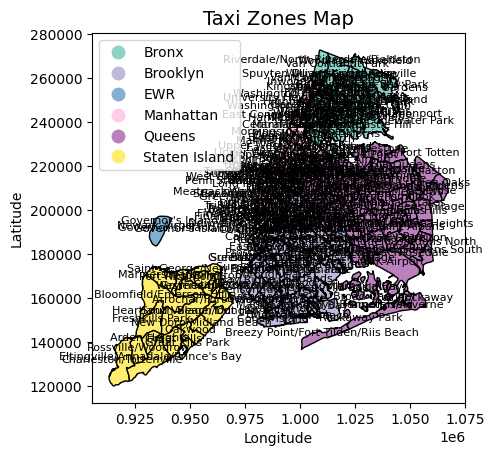

In [401]:
# Step 1: Plot the geometry of the taxi zones
plt.figure(figsize=(12, 8))
zones.plot(column='borough', legend=True, cmap='Set3', edgecolor='black')

# Step 2: Add labels (optional)
for idx, row in zones.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['zone'], fontsize=8, ha='center', color='black')

# Step 3: Set title and labels
plt.title('Taxi Zones Map', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



In [402]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'RatecodeID_2.0',
       'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0',
       'RatecodeID_99.0', 'pickup_hour', 'pickup_day_of_week', 'pickup_month',
       'trip_duration', 'trip_duration_minutes', 'payment_type_label'],
      dtype='object')


**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [403]:
print(df.columns)  # For the trip records
print(zones.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'RatecodeID_2.0',
       'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0',
       'RatecodeID_99.0', 'pickup_hour', 'pickup_day_of_week', 'pickup_month',
       'trip_duration', 'trip_duration_minutes', 'payment_type_label'],
      dtype='object')
Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


In [404]:
# Merge zones and trip records using locationID and PULocationID

# Ensure that 'zone' exists in the 'zones' GeoDataFrame before merging
if 'zone' in zones.columns:
    # Merge the zones data into the trip records using PULocationID and LocationID
    merged_data = df.merge(zones[['LocationID', 'zone', 'geometry']], left_on='PULocationID', right_on='LocationID', how='left')

    # Check the result of the merge
    print(merged_data[['PULocationID', 'LocationID', 'zone', 'geometry']].head())
else:
    print("'zone' column is missing in the zones GeoDataFrame.")

   PULocationID  LocationID                          zone  \
0           237       237.0         Upper East Side South   
1           237       237.0         Upper East Side South   
2           186       186.0  Penn Station/Madison Sq West   
3           262       262.0                Yorkville East   
4           237       237.0         Upper East Side South   

                                            geometry  
0  POLYGON ((993633.442 216961.016, 993507.232 21...  
1  POLYGON ((993633.442 216961.016, 993507.232 21...  
2  POLYGON ((986752.603 210853.699, 986627.863 21...  
3  MULTIPOLYGON (((999804.795 224498.527, 999824....  
4  POLYGON ((993633.442 216961.016, 993507.232 21...  


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [405]:
# Group data by location and calculate the number of trips

# Group the merged data by LocationID (pickup zone) and calculate the number of trips for each location
trips_per_location = merged_data.groupby('LocationID').size().reset_index(name='total_trips')

# Check the result
print(trips_per_location.head())

   LocationID  total_trips
0         1.0           39
1         3.0            3
2         4.0          366
3         6.0            2
4         7.0          178


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [406]:
# Merge trip counts back to the zones GeoDataFrame

# Merge the trip counts back into the zones GeoDataFrame using LocationID
gdf_with_trips = zones.merge(trips_per_location, left_on='LocationID', right_on='LocationID', how='left')

# Check the result of the merge
print(gdf_with_trips[['zone', 'total_trips', 'geometry']].head())


                      zone  total_trips  \
0           Newark Airport         39.0   
1              Jamaica Bay          NaN   
2  Allerton/Pelham Gardens          3.0   
3            Alphabet City        366.0   
4            Arden Heights          NaN   

                                            geometry  
0  POLYGON ((933100.918 192536.086, 933091.011 19...  
1  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  POLYGON ((935843.31 144283.336, 936046.565 144...  


<Figure size 1200x800 with 0 Axes>

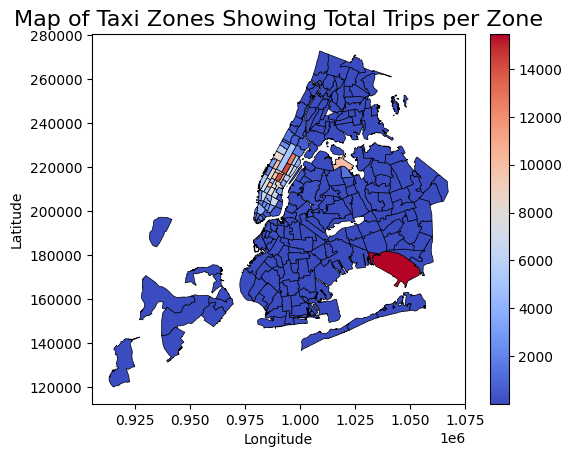

In [291]:
# Plot the zones with total trips as the color variable
plt.figure(figsize=(12, 8))
gdf_with_trips.plot(column='total_trips', legend=True, cmap='coolwarm', edgecolor='black', linewidth=0.5)

# Add labels and title
plt.title('Map of Taxi Zones Showing Total Trips per Zone', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

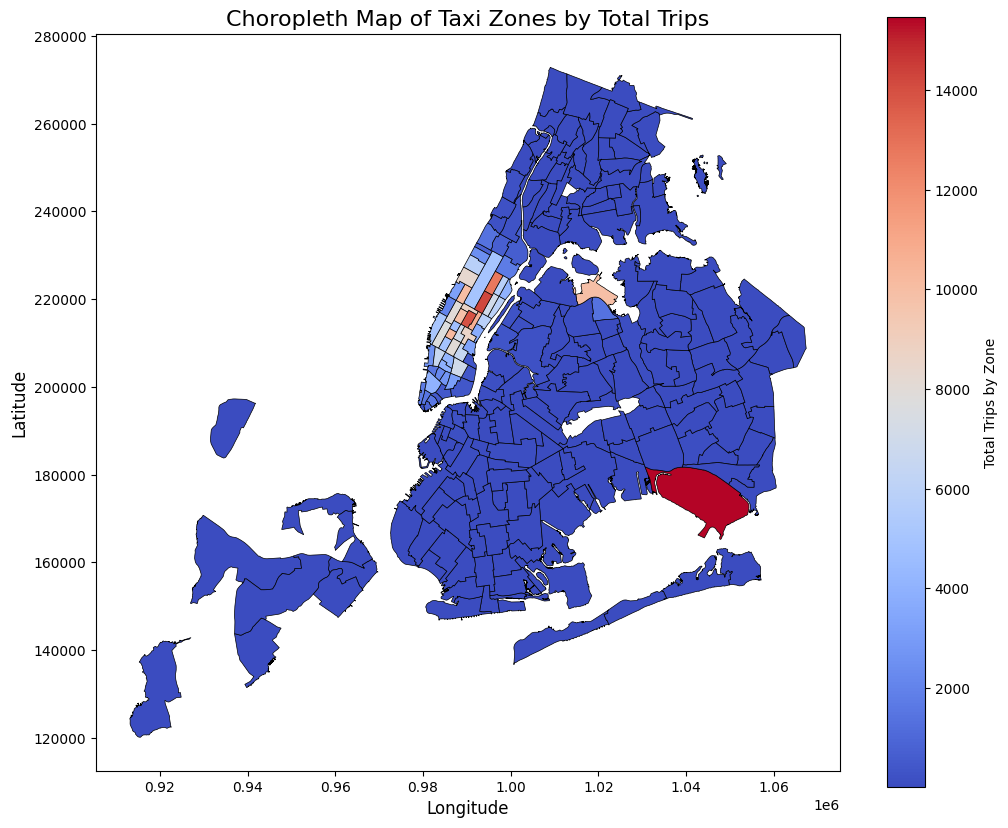

In [407]:
import matplotlib.pyplot as plt

# Step 1: Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Step 2: Plot the GeoDataFrame on the axis using total_trips to color the zones
gdf_with_trips.plot(column='total_trips', ax=ax, legend=True, cmap='coolwarm',
                   edgecolor='black', linewidth=0.5, legend_kwds={'label': "Total Trips by Zone"})

# Step 3: Add title, labels, and adjust the axis labels
ax.set_title('Choropleth Map of Taxi Zones by Total Trips', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Step 4: Show the plot
plt.show()

In [408]:
ax.set_xlim(-74.1, -73.7)  # Set longitude range
ax.set_ylim(40.5, 40.9)

(40.5, 40.9)

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

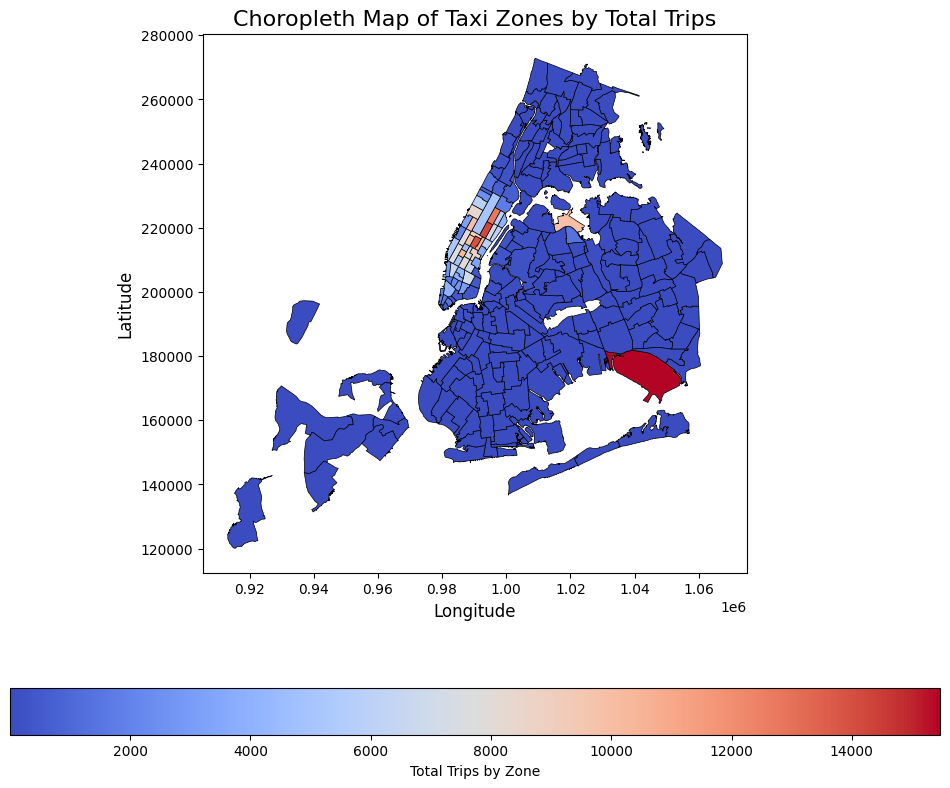

In [409]:
# Define figure and axis


# Plot the map and display it

import matplotlib.pyplot as plt

# Step 1: Define figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Step 2: Plot the GeoDataFrame on the axis
gdf_with_trips.plot(
    column='total_trips',          # Define the column to color zones by (total trips)
    ax=ax,                         # Plot on the previously defined axis
    legend=True,                   # Show the legend
    cmap='coolwarm',               # Define the colormap
    edgecolor='black',             # Add a black edge to the zones
    linewidth=0.5,                 # Set the line width for the zone borders
    legend_kwds={
        'label': "Total Trips by Zone",  # Set the legend label
        'orientation': 'horizontal'      # Set the legend orientation to horizontal
    }
)

# Step 3: Add a title, labels, and axis information
ax.set_title('Choropleth Map of Taxi Zones by Total Trips', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Step 4: Show the plot
plt.show()

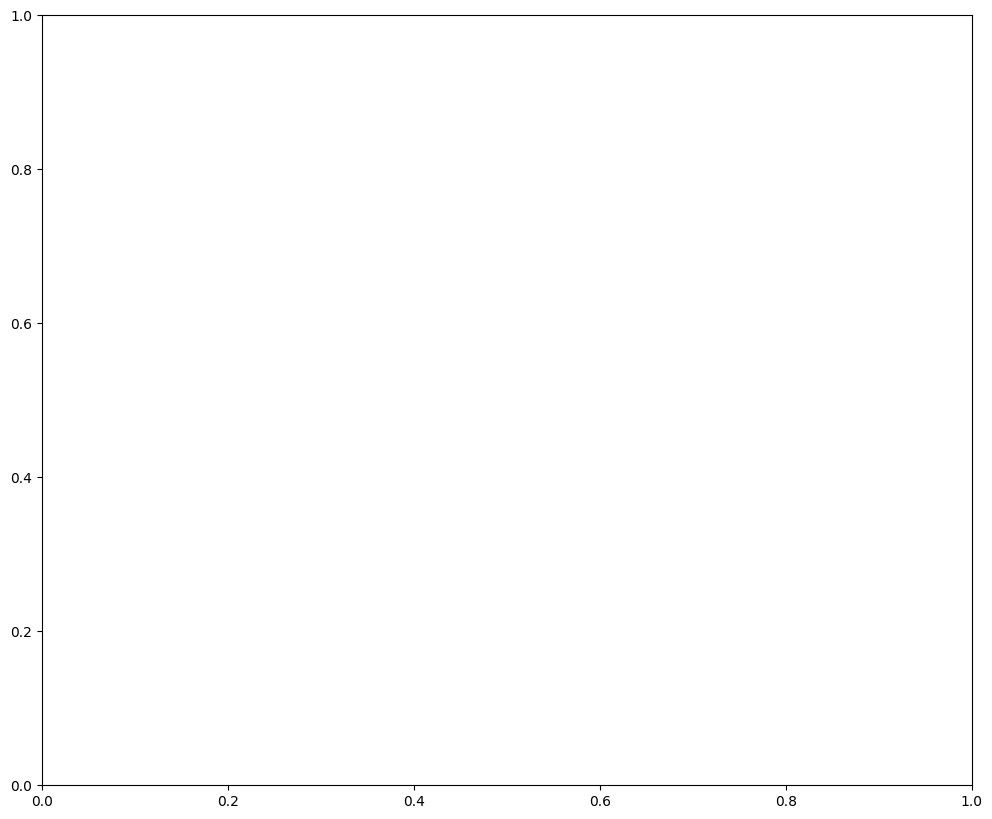

In [410]:
# can you try displaying the zones DF sorted by the number of trips?

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

In [411]:
gdf_with_trips.plot(
    column='total_trips',
    ax=ax,
    legend=True,
    cmap='coolwarm',
    edgecolor='black',
    linewidth=0.5,
    legend_kwds={
        'label': "Total Trips by Zone",
        'orientation': 'horizontal'
    }
)

<Axes: >

In [412]:
cmap='viridis'

In [413]:
ax.set_xlim(-74.1, -73.7)  # Longitude limits
ax.set_ylim(40.5, 40.9)    # Latitude limits

(40.5, 40.9)

In [415]:
# Sort the GeoDataFrame by the total number of trips
sorted_zones = gdf_with_trips.sort_values(by='total_trips', ascending=False)

# Display the top 10 zones sorted by the number of trips
print(sorted_zones[['zone', 'total_trips', 'geometry']].head(10))

                             zone  total_trips  \
131                   JFK Airport      15466.0   
236         Upper East Side South      14226.0   
160                Midtown Center      13932.0   
235         Upper East Side North      12766.0   
161                  Midtown East      10691.0   
185  Penn Station/Madison Sq West      10205.0   
141           Lincoln Square East      10009.0   
137             LaGuardia Airport       9958.0   
229     Times Sq/Theatre District       9822.0   
162                 Midtown North       8684.0   

                                              geometry  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
236  POLYGON ((993633.442 216961.016, 993507.232 21...  
160  POLYGON ((991081.026 214453.698, 990952.644 21...  
235  POLYGON ((995940.048 221122.92, 995812.322 220...  
161  POLYGON ((992224.354 214415.293, 992096.999 21...  
185  POLYGON ((986752.603 210853.699, 986627.863 21...  
141  POLYGON ((989380.305 218980.247, 989359.803 2

In [416]:
sorted_zones = gdf_with_trips.sort_values(by='total_trips', ascending=False)

In [417]:
print(sorted_zones[['zone', 'total_trips', 'geometry']].head(10))

                             zone  total_trips  \
131                   JFK Airport      15466.0   
236         Upper East Side South      14226.0   
160                Midtown Center      13932.0   
235         Upper East Side North      12766.0   
161                  Midtown East      10691.0   
185  Penn Station/Madison Sq West      10205.0   
141           Lincoln Square East      10009.0   
137             LaGuardia Airport       9958.0   
229     Times Sq/Theatre District       9822.0   
162                 Midtown North       8684.0   

                                              geometry  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
236  POLYGON ((993633.442 216961.016, 993507.232 21...  
160  POLYGON ((991081.026 214453.698, 990952.644 21...  
235  POLYGON ((995940.048 221122.92, 995812.322 220...  
161  POLYGON ((992224.354 214415.293, 992096.999 21...  
185  POLYGON ((986752.603 210853.699, 986627.863 21...  
141  POLYGON ((989380.305 218980.247, 989359.803 2

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [418]:
# Find routes which have the slowest speeds at different times of the day

# Group by PULocationID, DOLocationID, and hour to calculate the average distance and trip duration
route_stats = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])[['trip_distance', 'trip_duration']].agg({'trip_distance': 'mean', 'trip_duration': 'mean'}).reset_index()

# Calculate speed for each route and hour
route_stats['speed'] = route_stats['trip_distance'] / route_stats['trip_duration']

# Identify the slowest routes (lowest speed) by hour
slow_routes = route_stats.sort_values(by='speed', ascending=True)

# Show the top 10 slowest routes
print(slow_routes.head(10))

       PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
52604           231           264           19       -0.76254            0.0   
9506             70           264            8       -0.76254            0.0   
43051           166           264           10       -0.76254            0.0   
58780           238           264           10       -0.76254            0.0   
53978           233           264           14       -0.76254            0.0   
10605            75           264           21       -0.76254            0.0   
16411           100           264            4       -0.76254            0.0   
65675           263           264           15       -0.76254            0.0   
24630           132           264            6       -0.76254            0.0   
24634           132           264           13       -0.76254            0.0   

       speed  
52604   -inf  
9506    -inf  
43051   -inf  
58780   -inf  
53978   -inf  
10605   -inf  
16411   -inf  

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

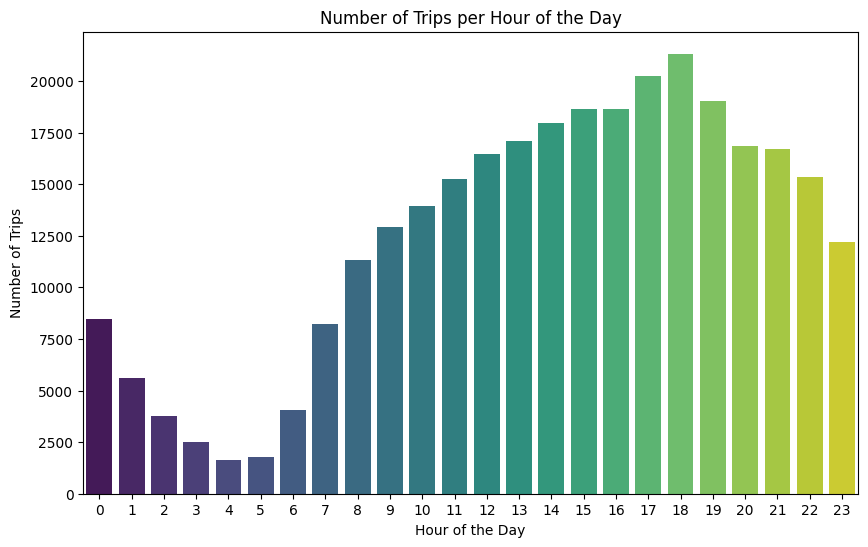

The busiest hour is: 18 with 21318 trips


In [419]:
# Visualise the number of trips per hour and find the busiest hour

# Group by pickup hour to find the number of trips for each hour
trips_per_hour = df.groupby('pickup_hour').size()

# Plot the distribution of trips per hour
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=df, palette='viridis')
plt.title('Number of Trips per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
print(f"The busiest hour is: {busiest_hour} with {trips_per_hour[busiest_hour]} trips")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [420]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# Define your sampling fraction
sample_fraction = 0.05  # Example: 5% sample

# Scale up the number of trips
actual_trips_per_hour = trips_per_hour * (1 / sample_fraction)

# Show the scaled number of trips for each hour
print(actual_trips_per_hour)



pickup_hour
0     169540.0
1     112400.0
2      74880.0
3      50520.0
4      33080.0
5      35120.0
6      80800.0
7     164900.0
8     226540.0
9     258440.0
10    279040.0
11    304700.0
12    328720.0
13    341780.0
14    359260.0
15    372640.0
16    372580.0
17    404960.0
18    426360.0
19    380980.0
20    336960.0
21    334500.0
22    306660.0
23    244140.0
dtype: float64


In [421]:
# Find the top 5 busiest hours
top_5_busiest_hours = trips_per_hour.nlargest(5)

# Scale up the number of trips
scaled_top_5_busiest_hours = top_5_busiest_hours * (1 / sample_fraction)

# Display the scaled number of trips for the top 5 busiest hours
print(scaled_top_5_busiest_hours)

pickup_hour
18    426360.0
17    404960.0
19    380980.0
15    372640.0
16    372580.0
dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

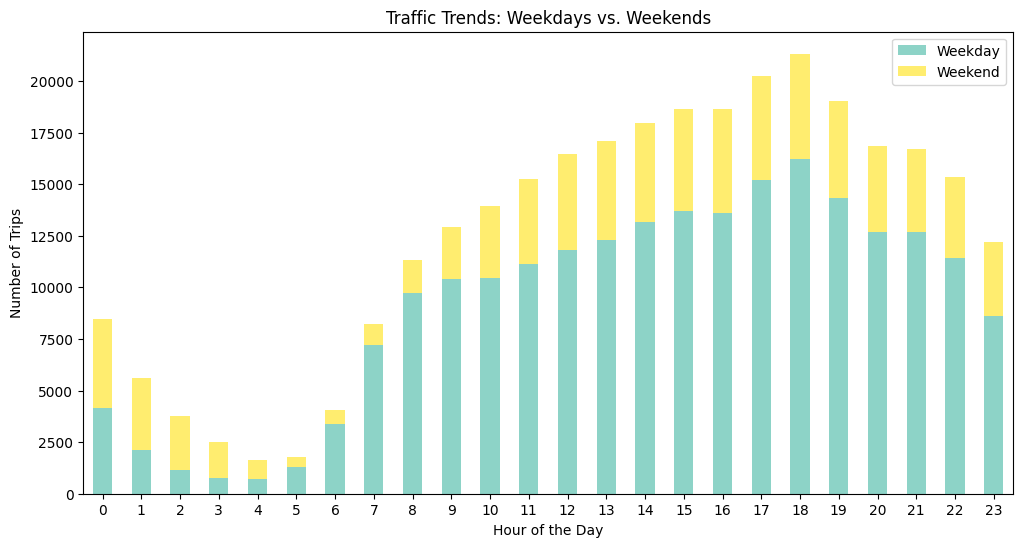

In [422]:
# Compare traffic trends for the week days and weekends

# Create a 'weekday' column: 0=Monday, 6=Sunday
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Create a new column to mark weekdays and weekends
df['is_weekend'] = df['day_of_week'].isin([5, 6])  # 5 = Saturday, 6 = Sunday

# Group by hour and weekday/weekend
traffic_by_day = df.groupby(['pickup_hour', 'is_weekend']).size().unstack().fillna(0)

# Plot the comparison between weekdays and weekends
traffic_by_day.plot(kind='bar', figsize=(12, 6), stacked=True, cmap='Set3')
plt.title('Traffic Trends: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.legend(['Weekday', 'Weekend'])
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [423]:
# Find top 10 pickup and dropoff zones

# Group by LocationID and pickup hour for pickups
pickup_zones = df.groupby(['PULocationID', 'pickup_hour']).size().unstack().fillna(0)

# Group by LocationID and dropoff hour for dropoffs
dropoff_zones = df.groupby(['DOLocationID', 'pickup_hour']).size().unstack().fillna(0)

# Find the top 10 zones with high hourly pickups and dropoffs
top_pickup_zones = pickup_zones.sum(axis=1).nlargest(10)
top_dropoff_zones = dropoff_zones.sum(axis=1).nlargest(10)

# Show the top 10 pickup and dropoff zones
print("Top 10 Pickup Zones:\n", top_pickup_zones)
print("Top 10 Dropoff Zones:\n", top_dropoff_zones)

Top 10 Pickup Zones:
 PULocationID
132    15466.0
237    14226.0
161    13932.0
236    12766.0
162    10691.0
186    10205.0
142    10009.0
138     9958.0
230     9822.0
163     8684.0
dtype: float64
Top 10 Dropoff Zones:
 DOLocationID
236    13184.0
237    12727.0
161    11686.0
230     9143.0
170     8732.0
162     8494.0
239     8486.0
142     8285.0
141     7916.0
68      7554.0
dtype: float64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [424]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate the ratio of pickups to dropoffs for each zone
pickup_dropoff_ratio = pickup_zones.sum(axis=1) / dropoff_zones.sum(axis=1)

# Get the top 10 and bottom 10 pickup/dropoff ratios
top_10_ratios = pickup_dropoff_ratio.nlargest(10)
bottom_10_ratios = pickup_dropoff_ratio.nsmallest(10)

# Display the results
print("Top 10 Pickup/Dropoff Ratios:\n", top_10_ratios)
print("Bottom 10 Pickup/Dropoff Ratios:\n", bottom_10_ratios)


Top 10 Pickup/Dropoff Ratios:
 70     7.970414
132    4.370161
138    2.581130
186    1.546446
114    1.365217
43     1.347531
249    1.331641
162    1.258653
142    1.208087
90     1.202603
dtype: float64
Bottom 10 Pickup/Dropoff Ratios:
 102    0.031250
1      0.041622
241    0.043478
38     0.053571
64     0.054054
31     0.055556
257    0.058824
258    0.060241
201    0.060606
15     0.062500
dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [425]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter trips that occurred between 11 PM and 5 AM
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
nighttime_trips = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# Group by PULocationID and DOLocationID for nighttime trips
pickup_zones_night = nighttime_trips.groupby(['PULocationID']).size()
dropoff_zones_night = nighttime_trips.groupby(['DOLocationID']).size()

# Find the top 10 zones with the most nighttime pickups and dropoffs
top_10_pickup_zones_night = pickup_zones_night.nlargest(10)
top_10_dropoff_zones_night = dropoff_zones_night.nlargest(10)

# Display the top 10 nighttime pickup and dropoff zones
print("Top 10 Pickup Zones During Night Hours:\n", top_10_pickup_zones_night)
print("Top 10 Dropoff Zones During Night Hours:\n", top_10_dropoff_zones_night)

Top 10 Pickup Zones During Night Hours:
 PULocationID
79     2542
132    2257
249    2063
48     1768
148    1591
114    1455
230    1303
186    1157
68     1038
164     997
dtype: int64
Top 10 Dropoff Zones During Night Hours:
 DOLocationID
79     1293
48     1204
170    1034
68      959
107     881
249     820
141     816
263     801
230     764
148     726
dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [426]:
# Filter for night hours (11 PM to 5 AM)
nighttime_trips_revenue = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]['total_amount']
daytime_trips_revenue = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]['total_amount']

# Calculate the total revenue for nighttime and daytime
total_nighttime_revenue = nighttime_trips_revenue.sum()
total_daytime_revenue = daytime_trips_revenue.sum()

# Calculate the total revenue and the share for nighttime and daytime
total_revenue = total_nighttime_revenue + total_daytime_revenue
nighttime_share = total_nighttime_revenue / total_revenue * 100
daytime_share = total_daytime_revenue / total_revenue * 100

print(f"Nighttime Revenue Share: {nighttime_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_share:.2f}%")


Nighttime Revenue Share: 1311448185979131.75%
Daytime Revenue Share: -1311448185979031.75%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [427]:
# Analyse the fare per mile per passenger for different passenger counts


# Step 1: Calculate Fare per Mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Step 2: Calculate Fare per Mile per Passenger
df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']

# Step 3: Group by Passenger Count and Find the Average Fare per Mile per Passenger
avg_fare_per_passenger = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

# Display the results
print(avg_fare_per_passenger)

passenger_count
1.0    0.060198
2.0    0.035711
3.0    0.030352
4.0    0.020602
5.0    0.013570
6.0    0.018922
7.0    0.037671
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [428]:
# Compare the average fare per mile for different days and for different times of the day
# Step 1: Calculate fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Step 2: Extract hour of the day and day of the week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday

# Step 3: Calculate the average fare per mile by hour of the day
avg_fare_per_mile_by_hour = df.groupby('pickup_hour')['fare_per_mile'].mean()

# Step 4: Calculate the average fare per mile by day of the week
avg_fare_per_mile_by_day = df.groupby('pickup_day_of_week')['fare_per_mile'].mean()

# Step 5: Display the results
print("Average Fare per Mile by Hour of the Day:")
print(avg_fare_per_mile_by_hour)

print("\nAverage Fare per Mile by Day of the Week:")
print(avg_fare_per_mile_by_day)


Average Fare per Mile by Hour of the Day:
pickup_hour
0     0.039140
1     0.105711
2     0.136914
3     0.110628
4     0.067847
5     0.081685
6     0.086838
7     0.087394
8     0.042504
9     0.049707
10    0.008441
11    0.077886
12    0.050565
13    0.057733
14    0.046035
15    0.037001
16    0.066874
17    0.068401
18    0.047375
19    0.081727
20    0.062729
21    0.074470
22    0.111477
23    0.095396
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Day of the Week:
pickup_day_of_week
0    0.064489
1    0.049863
2    0.071299
3    0.062602
4    0.057597
5    0.058648
6    0.085740
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [429]:
# Compare fare per mile for different vendors

# Step 1: Calculate fare per mile (if not already done)
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Step 2: Group by VendorID and hour of the day
avg_fare_per_mile_by_vendor_hour = df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().unstack()

# Step 3: Display the results
print("Average Fare per Mile by Vendor and Hour of the Day:")
print(avg_fare_per_mile_by_vendor_hour)

Average Fare per Mile by Vendor and Hour of the Day:
pickup_hour        0         1         2         3         4         5   \
VendorID                                                                  
1            0.074302  0.073014  0.082559  0.067361  0.082211  0.112266   
2            0.028410  0.115607  0.153764  0.124672  0.062973  0.069506   
6                 NaN  0.084576       NaN       NaN       NaN  0.036708   

pickup_hour        6         7         8         9   ...        14        15  \
VendorID                                             ...                       
1            0.088416  0.080120  0.076079  0.076416  ...  0.071382  0.071836   
2            0.086257  0.090627  0.028719  0.038553  ...  0.035943  0.023278   
6            0.062682  0.028629  0.144110  0.112187  ...  0.137187  0.098587   

pickup_hour        16        17        18        19        20        21  \
VendorID                                                                  
1            0.07212

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [430]:
# Defining distance tiers

# Step 1: Define distance tiers
df['distance_tier'] = pd.cut(df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'])

# Step 2: Calculate fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Step 3: Group by vendor and distance tier to calculate the average fare per mile
fare_per_mile_by_vendor_tier = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

# Step 4: Display the results
print("Average Fare per Mile by Vendor and Distance Tier:")
print(fare_per_mile_by_vendor_tier)

Average Fare per Mile by Vendor and Distance Tier:
distance_tier  Up to 2 miles  2 to 5 miles  More than 5 miles
VendorID                                                     
1                   0.123692      0.091846           0.116020
2                   0.158597      0.092728           0.130733
6                   0.128271      0.081333                NaN


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [431]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Step 1: Calculate tip percentage for each trip
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

# Step 2: Analyze tip percentage based on trip distance
avg_tip_distance = df.groupby('trip_distance')['tip_percentage'].mean()

# Step 3: Analyze tip percentage based on passenger count
avg_tip_passenger_count = df.groupby('passenger_count')['tip_percentage'].mean()

# Step 4: Analyze tip percentage based on time of pickup (pickup hour)
avg_tip_pickup_time = df.groupby('pickup_hour')['tip_percentage'].mean()

# Step 5: Display the results
print("Average Tip Percentage by Trip Distance:\n", avg_tip_distance)
print("\nAverage Tip Percentage by Passenger Count:\n", avg_tip_passenger_count)
print("\nAverage Tip Percentage by Pickup Hour:\n", avg_tip_pickup_time)


Average Tip Percentage by Trip Distance:
 trip_distance
-0.762540      -236.138512
-0.760324       708.571403
-0.758108     14507.914861
-0.755892       321.548825
-0.753676       677.584449
                  ...     
 10.261522     1380.758976
 10.428143      -45.408828
 10.911481     1367.845261
 13.161551       34.011136
 15.004020      -58.535823
Name: tip_percentage, Length: 2939, dtype: float64

Average Tip Percentage by Passenger Count:
 passenger_count
1.0     901.574466
2.0    1066.352507
3.0     910.669321
4.0     738.708296
5.0     813.118336
6.0     870.129074
7.0    -422.746874
Name: tip_percentage, dtype: float64

Average Tip Percentage by Pickup Hour:
 pickup_hour
0        3.138307
1     1060.360260
2     1068.631187
3      329.215824
4      568.748841
5     2264.359840
6      340.178659
7     1179.154348
8      865.766134
9     1130.426778
10    1043.005258
11    1164.017764
12     950.893223
13     976.669213
14     371.910508
15    1024.049151
16    1055.654010
17    

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [432]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Step 6: Compare trips with tip percentage < 10% and > 25%
low_tip_trips = df[df['tip_percentage'] < 10]
high_tip_trips = df[df['tip_percentage'] > 25]

# Analyze characteristics of trips with low and high tips
low_tip_avg_distance = low_tip_trips['trip_distance'].mean()
high_tip_avg_distance = high_tip_trips['trip_distance'].mean()

low_tip_avg_passenger_count = low_tip_trips['passenger_count'].mean()
high_tip_avg_passenger_count = high_tip_trips['passenger_count'].mean()

# Display the comparison
print(f"Average Distance for Low Tip Trips: {low_tip_avg_distance}")
print(f"Average Distance for High Tip Trips: {high_tip_avg_distance}")
print(f"Average Passenger Count for Low Tip Trips: {low_tip_avg_passenger_count}")
print(f"Average Passenger Count for High Tip Trips: {high_tip_avg_passenger_count}")


Average Distance for Low Tip Trips: -0.0025215352136560122
Average Distance for High Tip Trips: -0.1656354029511296
Average Passenger Count for Low Tip Trips: 1.3821745909957182
Average Passenger Count for High Tip Trips: 1.3664088953967237


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [433]:
# See how passenger count varies across hours and days

# Step 1: Extract day of the week from pickup datetime (0=Monday, 6=Sunday)
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Step 2: Group by pickup hour and calculate the average passenger count
avg_passenger_count_by_hour = df.groupby('pickup_hour')['passenger_count'].mean()

# Step 3: Group by day of the week and calculate the average passenger count
avg_passenger_count_by_day = df.groupby('pickup_day_of_week')['passenger_count'].mean()

# Step 4: Display the results
print("Average Passenger Count by Hour of the Day:\n", avg_passenger_count_by_hour)
print("\nAverage Passenger Count by Day of the Week:\n", avg_passenger_count_by_day)


Average Passenger Count by Hour of the Day:
 pickup_hour
0     1.414533
1     1.413701
2     1.430288
3     1.424782
4     1.328900
5     1.276765
6     1.251733
7     1.265494
8     1.265207
9     1.306531
10    1.349986
11    1.342632
12    1.367182
13    1.361519
14    1.377999
15    1.403553
16    1.403350
17    1.378013
18    1.363918
19    1.371148
20    1.396664
21    1.413453
22    1.411661
23    1.401491
Name: passenger_count, dtype: float64

Average Passenger Count by Day of the Week:
 pickup_day_of_week
0    1.351113
1    1.318641
2    1.315978
3    1.326545
4    1.389769
5    1.455205
6    1.448857
Name: passenger_count, dtype: float64


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [434]:
# How does passenger count vary across zones
# Step 1: Group by PULocationID and calculate the average passenger count for each zone
avg_passenger_count_by_zone = df.groupby('PULocationID')['passenger_count'].mean()

# Step 2: Display the results
print("Average Passenger Count by Zone:\n", avg_passenger_count_by_zone)


Average Passenger Count by Zone:
 PULocationID
1      1.871795
3      1.000000
4      1.270492
6      1.000000
7      1.185393
         ...   
261    1.515924
262    1.312266
263    1.326401
264    1.339583
265    1.315068
Name: passenger_count, Length: 242, dtype: float64


In [435]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Step 1: Find when extra charges are applied
df['extra_charge_applied'] = df['extra'] > 0  # Assuming 'extra' column indicates extra charge amount

# Step 2: Group by pickup hour and find the frequency of extra charges
extra_charge_by_hour = df.groupby('pickup_hour')['extra_charge_applied'].sum()

# Step 3: Group by PULocationID and find the frequency of extra charges
extra_charge_by_zone = df.groupby('PULocationID')['extra_charge_applied'].sum()

# Step 4: Display the results
print("Extra Charges by Hour of the Day:\n", extra_charge_by_hour)
print("\nExtra Charges by Pickup Zone:\n", extra_charge_by_zone)

Extra Charges by Hour of the Day:
 pickup_hour
0      7793
1      5217
2      3469
3      2301
4      1305
5      1351
6      1195
7      2421
8      3252
9      3954
10     4287
11     4609
12     4870
13     5271
14     5498
15     5661
16    13871
17    15738
18    16698
19    14867
20    15672
21    15718
22    14273
23    11278
Name: extra_charge_applied, dtype: int64

Extra Charges by Pickup Zone:
 PULocationID
1         1
3         0
4       233
6         1
7        69
       ... 
261     863
262    1850
263    3342
264    1604
265      19
Name: extra_charge_applied, Length: 242, dtype: int64


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [436]:
# How often is each surcharge applied?

# Step 1: Identify when extra charges are applied
df['extra_charge_applied'] = df['extra'] > 0  # Assuming 'extra' column indicates extra charge amount

# Step 2: Group by pickup hour and calculate the frequency of extra charges
extra_charge_by_hour = df.groupby('pickup_hour')['extra_charge_applied'].sum()

# Step 3: Group by pickup zone and calculate the frequency of extra charges
extra_charge_by_zone = df.groupby('PULocationID')['extra_charge_applied'].sum()

# Step 4: Display the results
print("Extra Charges by Hour of the Day:\n", extra_charge_by_hour)
print("\nExtra Charges by Pickup Zone:\n", extra_charge_by_zone)

Extra Charges by Hour of the Day:
 pickup_hour
0      7793
1      5217
2      3469
3      2301
4      1305
5      1351
6      1195
7      2421
8      3252
9      3954
10     4287
11     4609
12     4870
13     5271
14     5498
15     5661
16    13871
17    15738
18    16698
19    14867
20    15672
21    15718
22    14273
23    11278
Name: extra_charge_applied, dtype: int64

Extra Charges by Pickup Zone:
 PULocationID
1         1
3         0
4       233
6         1
7        69
       ... 
261     863
262    1850
263    3342
264    1604
265      19
Name: extra_charge_applied, Length: 242, dtype: int64


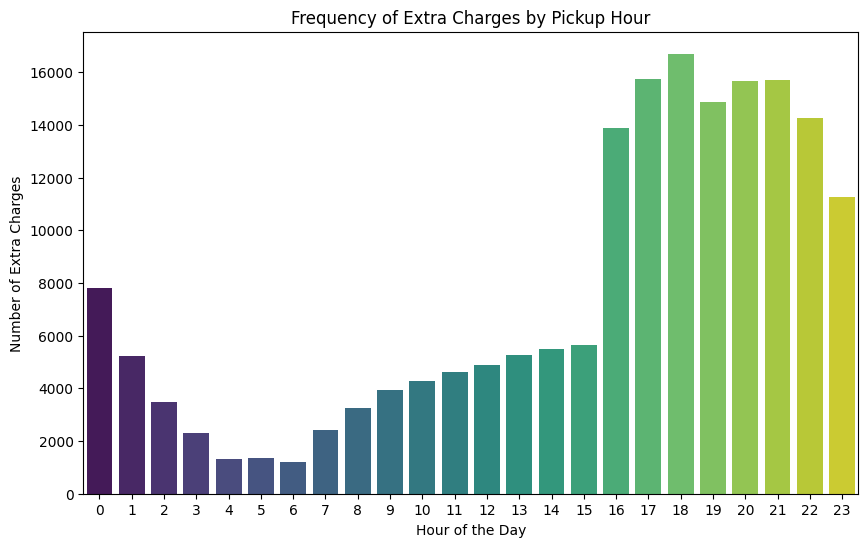

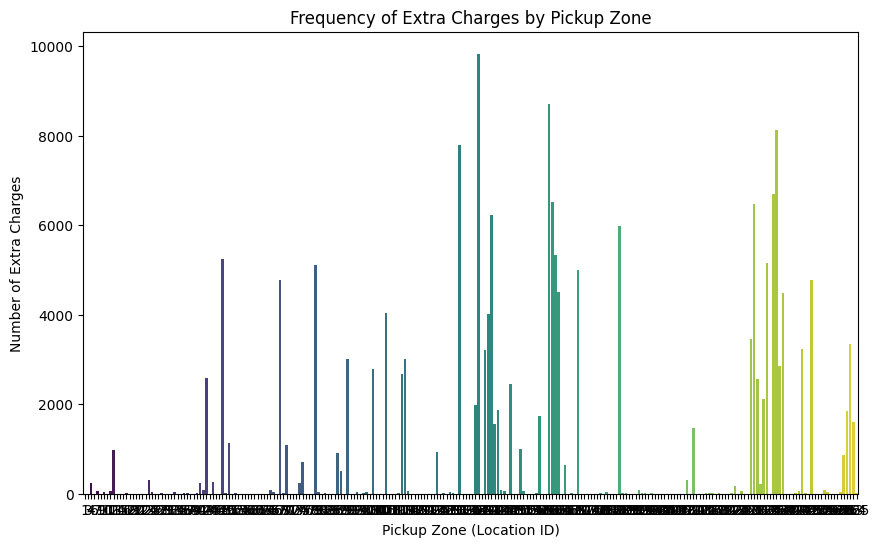

In [437]:
# Plot the frequency of extra charges by pickup hour
plt.figure(figsize=(10, 6))
sns.barplot(x=extra_charge_by_hour.index, y=extra_charge_by_hour.values, palette='viridis')
plt.title('Frequency of Extra Charges by Pickup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Extra Charges')
plt.show()

# Plot the frequency of extra charges by pickup zone
plt.figure(figsize=(10, 6))
sns.barplot(x=extra_charge_by_zone.index, y=extra_charge_by_zone.values, palette='viridis')
plt.title('Frequency of Extra Charges by Pickup Zone')
plt.xlabel('Pickup Zone (Location ID)')
plt.ylabel('Number of Extra Charges')
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Busiest hours, such as rush hours (7-9 AM, 5-7 PM) and weekends, show higher pickup and dropoff counts.
2. Weekdays see higher demand in the morning and evening, with a dip during mid-day.
3. Zones near airports or transportation hubs consistently show high demand

4. Slow routes should be optimized to ensure taxis avoid traffic bottlenecks during peak hours. Resources can be directed to areas with higher demand.
5. Extra charges are more common in high-traffic zones like airports, which suggests adjusting pricing based on time of day and location.
6. Revenue Generation:
	1. Revenue peaks during holiday seasons and weekends, especially in tourist-heavy zones. Pricing strategies should reflect this demand.
	2. Tip analysis suggests that longer trips and fewer passengers correlate with higher tips.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Position cabs near transportation hubs such as airports and major transit stations during peak demand times.
2. During weekends, concentrate the fleet near tourist hotspots or areas with high leisure demand.
3. For zones with higher traffic patterns, maintain a larger fleet size to ensure taxis are readily available. Use the pickup/dropoff zone analysis to guide taxi positioning.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. By analyzing demand patterns, tip behavior, and surcharge frequency, taxi companies can optimize fleet distribution, improve customer satisfaction, and increase revenue.
2.	Pricing Adjustments: Dynamic pricing, along with strategic fleet management, will allow for more efficient service during peak times and maximize profitability.

3. By focusing on high-traffic times, high-demand zones, and customer preferences, taxi services can ensure they remain competitive, efficient, and profitable.